#SENTIMENT ANALYSIS

##IMPORTING THE LIBRARIES

In [ ]:
##IMPORTING THE LIBRARIES
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random                       #FOR PSEUDO RANDOM NUMBER GENERATION
from wordcloud import WordCloud     #TO VISUALIZE THE TEXT DATA
from wordcloud import STOPWORDS

##READING THE DATA

In [ ]:
#MOUNTING THE DRIVE
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#READING THE CSV FILE
DF = pd.read_csv('/content/drive/MyDrive/SEM 5/ML/Sentiment Analysis.csv')
print(DF)

       uniqueID            drugName                              condition  \
0          1000               Mobic                         Osteoarthritis   
1           111           Meloxicam                         Osteoarthritis   
2            11           Orthovisc                         Osteoarthritis   
3           111          Infliximab                    Psoriatic Arthritis   
4           110            Euflexxa                         Osteoarthritis   
...         ...                 ...                                    ...   
25840       100           Westhroid  Hypothyroidism, After Thyroid Removal   
25841        11       Levothyroxine  Hypothyroidism, After Thyroid Removal   
25842      1100       Nature-Throid  Hypothyroidism, After Thyroid Removal   
25843       100  Thyroid desiccated  Hypothyroidism, After Thyroid Removal   
25844         1           Synthroid  Hypothyroidism, After Thyroid Removal   

                                                  review  Senti

##DATA PREPROCESSING


In [ ]:
#PRINTING THE COLUMN NAMES
print(DF.columns)

Index(['uniqueID', 'drugName', 'condition', 'review', 'Sentiment',
       'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9'],
      dtype='object')


In [ ]:
print(DF.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25845 entries, 0 to 25844
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   uniqueID    25845 non-null  int64  
 1   drugName    25845 non-null  object 
 2   condition   25845 non-null  object 
 3   review      25845 non-null  object 
 4   Sentiment   25845 non-null  int64  
 5   Unnamed: 5  0 non-null      float64
 6   Unnamed: 6  0 non-null      float64
 7   Unnamed: 7  0 non-null      float64
 8   Unnamed: 8  0 non-null      float64
 9   Unnamed: 9  0 non-null      float64
dtypes: float64(5), int64(2), object(3)
memory usage: 2.0+ MB
None


The last 5 columns are not needed in the dataframe.Their values are also Null.Hence we need to drop them.

It is also seen that there are no Null Values other columns.

In [ ]:
#DROPPING THE LAST FIVE COLUMNS
DF=DF.iloc[:,:-5]
print(DF)

       uniqueID            drugName                              condition  \
0          1000               Mobic                         Osteoarthritis   
1           111           Meloxicam                         Osteoarthritis   
2            11           Orthovisc                         Osteoarthritis   
3           111          Infliximab                    Psoriatic Arthritis   
4           110            Euflexxa                         Osteoarthritis   
...         ...                 ...                                    ...   
25840       100           Westhroid  Hypothyroidism, After Thyroid Removal   
25841        11       Levothyroxine  Hypothyroidism, After Thyroid Removal   
25842      1100       Nature-Throid  Hypothyroidism, After Thyroid Removal   
25843       100  Thyroid desiccated  Hypothyroidism, After Thyroid Removal   
25844         1           Synthroid  Hypothyroidism, After Thyroid Removal   

                                                  review  Senti

In [ ]:
#DESCRIBING THE DATA
print(DF.describe())

           uniqueID     Sentiment
count  25845.000000  25845.000000
mean     477.394931      0.425073
std     1250.237804      0.494364
min        0.000000      0.000000
25%       11.000000      0.000000
50%      110.000000      0.000000
75%     1000.000000      1.000000
max    11111.000000      1.000000


In [ ]:
#PRINTING THE DATATYPES OF THE DATASET
print(DF.dtypes)

uniqueID      int64
drugName     object
condition    object
review       object
Sentiment     int64
dtype: object


In [ ]:
#PRINTING THE UNIQUE VALUES IN EACH COLUMN OF THE DATASET
print("UNIQUE VALUES IN THE COLUMN - drugName")
UV=pd.unique(DF['drugName'])
print(UV)
print(len(list(UV)))
print("UNIQUE VALUES IN THE COLUMN - condition")
UV=pd.unique(DF['condition'])
print(len(list(UV)))
print("UNIQUE VALUES IN THE COLUMN - Sentiment")
UV=pd.unique(DF['Sentiment'])
print(len(list(UV)))

UNIQUE VALUES IN THE COLUMN - drugName
['Mobic' 'Meloxicam' 'Orthovisc' 'Infliximab' 'Euflexxa' 'Remicade'
 'Methyl salicylate' 'Etodolac' 'Celebrex' 'Cataflam' 'Hyaluronan'
 'Limbrel' 'Apremilast' 'Diclofenac' 'Enbrel' 'Celecoxib'
 'Sodium hyaluronate' 'Humira' 'Capzasin-HP' 'Arthrotec' 'Voltaren Gel'
 'Supartz' 'Tocilizumab' 'Adalimumab' 'Hylan g-f 00' 'Triamcinolone'
 'Prednisone' 'Colchicine / probenecid' 'Synvisc-One' 'Synvisc' 'Pennsaid'
 'Esomeprazole / naproxen' 'Voltaren' 'Doxycycline' 'Bextra'
 'Diclofenac / misoprostol' 'Relafen' 'Tylenol with Codeine #0' 'Cymbalta'
 'Salonpas Pain Patch' 'Etanercept' 'Monovisc' 'Vimovo' 'Ustekinumab'
 'Naproxen' 'Diflunisal' 'Duexis' 'Simponi' 'Famotidine / ibuprofen'
 'Sulfasalazine' 'Lodine' 'Hydroxychloroquine' 'Piroxicam' 'Stelara'
 'Duloxetine' 'Sulindac' 'Actemra' 'Orencia' 'Otezla' 'Valdecoxib'
 'Naprosyn' 'Zorvolex' 'Capsaicin' 'S-adenosylmethionine' 'Nabumetone'
 'Certolizumab' 'Bioflavonoids' 'Trolamine salicylate' 'Cosentyx'
 'Fe

We infer that there are 588 unique Drugs in the dataset,there are 40 medical conditions in the dataset.

In [ ]:
#CHECKING FOR DUPLICATES
DF.duplicated().value_counts()

False    25665
True       180
dtype: int64

It can be seen that there are 181 duplicates/redundant data.These are not needed and misleading as well by increasing the overall count.Hence we need to remove the duplicates.

In [ ]:
#REMOVING ALL THE DUPLICATES
DF = DF.drop_duplicates()
DF.duplicated().value_counts()

False    25665
dtype: int64

**PREPROCESSING USING NLTK(NATURAL LANGUAGE TOOL KIT)**

In [ ]:
#IMPORTING THE NLTK PACKAGE
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.sentiment import SentimentIntensityAnalyzer

In [ ]:
#DOWLOADING THE NLTK RESOURCES
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

**FINDING THE SENTIMENT VALUE OF ALL THE TEXTS USING NLTK**

In [ ]:
#INITIALIZING THE SENTIMENT INTENSITY ANALYSER
sia = SentimentIntensityAnalyzer()

#FUNCTION TO APPLY SENTIMENT ANALYSIS FOR SINGLE TEXT
def analyze_sentiment(text):
    sentiment_scores = sia.polarity_scores(text)
    return sentiment_scores['compound']

#APPLYING THE SENTIMENT ANALYSIS SCORE FOR THE TEXT DATA
DF['sentiment_score'] = DF['review'].apply(analyze_sentiment)
DF

uniqueID        drugName                              condition  \
0          1000           Mobic                         Osteoarthritis   
1           111       Meloxicam                         Osteoarthritis   
2            11       Orthovisc                         Osteoarthritis   
3           111      Infliximab                    Psoriatic Arthritis   
4           110        Euflexxa                         Osteoarthritis   
...         ...             ...                                    ...   
25823        11  Armour Thyroid  Hypothyroidism, After Thyroid Removal   
25825         0   Levothyroxine  Hypothyroidism, After Thyroid Removal   
25829       111          Forteo                     Hypoparathyroidism   
25834         1   Levothyroxine  Hypothyroidism, After Thyroid Removal   
25836        10   Levothyroxine  Hypothyroidism, After Thyroid Removal   

                                                  review  Sentiment  \
0      "Reduced my pain by 1% and lets me live a norm...          0   
1      "I have been using Mobic to relieve the pain f...          0   
2      "This is my third round of orthovisc. My great...          1   
3      "I have severe psoriatic arthritis and I&#001;...          0   
4      "After 0 years of astounding results from Supa...          0   
...                                                  ...        ...   
25823  "Complete Thyroidectemy for cancer and two HUG...          0   
25825  "I have used Levothroid and Synthroid.  I am c...          1   
25829  "I have been on Forteo 0 months now, I started...          0   
25834  "My thyroid disease was caught by my determina...          0   
25836  "Got my thyroid out in November due to cancer....          0   

       sentiment_score  
0              -0.5562  
1               0.2732  
2               0.4772  
3               0.4471  
4              -0.4803  
...                ...  
25823          -0.9927  
25825          -0.9390  
25829           0.5423  
25834           0.2537  
25836          -0.9300  

[25665 rows x 6 columns]

**Here** we have used the inbuilt SentimentIntensityAnalyzer resource to calculate the sentiment score.With this we now try to understand what 0 and 1 represent.

In [ ]:
def predict_class(score):
  if score < 0:
    return 0;
  else:
    return 1;

DF['Predicted_sentiment_score'] = DF['sentiment_score'].apply(predict_class)
#COUNTING THE NUMBER OF MISMATCHES
count=0
for index,row in DF.iterrows():
  if row['Predicted_sentiment_score']!=row['Sentiment']:
    count+=1
print(count*100/len(DF))

45.563997662185855


We can see that using this NLTK resource, 45% of the predicted value is wrong.Hence it is not a good way to predict.

**USING THE NLTK LIBRARY WE PERFORM THE FOLLOWING FUNCTIONS TO MAKE THE DATA FIT FOR MODELLING**

1.Tokenizes the text into words.

2.Removes common English stopwords.

3.Lemmatizes the remaining words.

In [ ]:
#DEFINING FUCNTIONS TO PERFORM THE NLTK PREPROCESSING STEPS

#1.USED TO TOKENIZE THE TEXT DATA                                               - EX : I AM ASH =>['I','AM','ASH']
def tokenize_text(text):
    tokens = word_tokenize(text)
    return tokens
#Tokenization is the process of splitting a text into individual words or units.

#2.USED TO REMOVE COMMON ENGLISH STOPWORDS FROM TOKENISED DATA
def remove_stopwords(tokens):
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
    return filtered_tokens
#Stopwords are words that are considered to be of little value in text analysis because they are very common and don't carry much meaningful information (e.g., "the," "and," "in").
#We use the NLTK library's list of English stopwords to identify and remove them from the list of tokens.

# 3.USED TO NORMALIZE THE TOKEN                                                 - EX : ["loving", "cats"]  => ["love", "cat"]
def lemmatize_text(tokens):
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return lemmatized_tokens
#Lemmatization is the process of reducing words to their base or root form. It aims to normalize words so that different inflections or forms of the same word are represented by a common base form.
#It uses the WordNetLemmatizer from the NLTK library to perform lemmatization.

#4.MAIN FUNCTION TO PERFORM ALL NLTK PREPROCESSING
def preprocess_text(text):
    tokens = tokenize_text(text)
    tokens = remove_stopwords(tokens)
    tokens = lemmatize_text(tokens)
    return ' '.join(tokens)  # Join the tokens back into a single string

#5.SIMILAR TO LEMATIZATION
def stem_text(tokens):
    stemmer = PorterStemmer()
    stemmed_tokens = [stemmer.stem(word) for word in tokens]
    return stemmed_tokens



In [ ]:
#CALLING THE preprocess_text FUNCTION
DF['review'] = DF['review'].apply(preprocess_text)

In [ ]:
#STORING THE PREPROCESSED DATA INTO A SEPERATE CSV FILE
DF.to_csv('Preprocessed_DataFrame.csv',index=False)
DF2=pd.read_csv('/content/Preprocessed_DataFrame.csv')
DF2

uniqueID        drugName                              condition  \
0          1000           Mobic                         Osteoarthritis   
1           111       Meloxicam                         Osteoarthritis   
2            11       Orthovisc                         Osteoarthritis   
3           111      Infliximab                    Psoriatic Arthritis   
4           110        Euflexxa                         Osteoarthritis   
...         ...             ...                                    ...   
25660        11  Armour Thyroid  Hypothyroidism, After Thyroid Removal   
25661         0   Levothyroxine  Hypothyroidism, After Thyroid Removal   
25662       111          Forteo                     Hypoparathyroidism   
25663         1   Levothyroxine  Hypothyroidism, After Thyroid Removal   
25664        10   Levothyroxine  Hypothyroidism, After Thyroid Removal   

                                                  review  Sentiment  \
0          `` Reduced pain 1 % let live normal life ! ''          0   
1      `` using Mobic relieve pain Spinal Fusion Marc...          0   
2      `` third round orthovisc . great fear pain inj...          1   
3      `` severe psoriatic arthritis & # 001 ; since ...          0   
4      `` 0 year astounding result Supartz , miss inj...          0   
...                                                  ...        ...   
25660  `` Complete Thyroidectemy cancer two HUGE goit...          0   
25661  `` used Levothroid Synthroid . currently Levot...          1   
25662  `` Forteo 0 month , started taking thyroid sur...          0   
25663  `` thyroid disease caught determination find r...          0   
25664  `` Got thyroid November due cancer . Started t...          0   

       sentiment_score  Predicted_sentiment_score  
0              -0.5562                          0  
1               0.2732                          1  
2               0.4772                          1  
3               0.4471                          1  
4              -0.4803                          0  
...                ...                        ...  
25660          -0.9927                          0  
25661          -0.9390                          0  
25662           0.5423                          1  
25663           0.2537                          1  
25664          -0.9300                          0  

[25665 rows x 7 columns]

**DETERMINING THE BAG OF WORDS FOR THE DATASET**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
# Create a CountVectorizer instance
vectorizer = CountVectorizer()

#FIT AND TRANFORM THE PREPROCESSED DATA
bow_matrix = vectorizer.fit_transform(DF['review'])
#The result is a sparse matrix where each row corresponds to a document (review), and each column corresponds to a unique word in your dataset.

bow_array = bow_matrix.toarray()
# The vocabulary (unique words) can be accessed as follows:
vocabulary = vectorizer.get_feature_names_out()
bow_df = pd.DataFrame(bow_array, columns=vocabulary)
bow_df

00  000  0000  00000  0000g  0000ish  0000mcg  0000mg  0000mgs  0000x  \
0       0    0     0      0      0        0        0       0        0      0   
1       0    0     1      0      0        0        0       0        0      0   
2       0    0     0      0      0        0        0       0        0      0   
3       1    0     0      0      0        0        0       0        0      0   
4       1    0     0      0      0        0        0       0        0      0   
...    ..  ...   ...    ...    ...      ...      ...     ...      ...    ...   
25660   0    0     0      0      0        0        0       0        0      0   
25661   1    0     0      0      0        0        0       0        0      0   
25662   0    0     0      0      0        0        0       0        0      0   
25663   0    0     3      0      0        0        0       0        0      0   
25664   0    0     0      0      0        0        0       0        0      0   

       ...  zuchiinni  zumba  zyban  zydis  zydus  zypexa  zyprexa  zyprexia  \
0      ...          0      0      0      0      0       0        0         0   
1      ...          0      0      0      0      0       0        0         0   
2      ...          0      0      0      0      0       0        0         0   
3      ...          0      0      0      0      0       0        0         0   
4      ...          0      0      0      0      0       0        0         0   
...    ...        ...    ...    ...    ...    ...     ...      ...       ...   
25660  ...          0      0      0      0      0       0        0         0   
25661  ...          0      0      0      0      0       0        0         0   
25662  ...          0      0      0      0      0       0        0         0   
25663  ...          0      0      0      0      0       0        0         0   
25664  ...          0      0      0      0      0       0        0         0   

       zypreza  zzzquil  
0            0        0  
1            0        0  
2            0        0  
3            0        0  
4            0        0  
...        ...      ...  
25660        0        0  
25661        0        0  
25662        0        0  
25663        0        0  
25664        0        0  

[25665 rows x 16203 columns]

The BoW representation converts text data into numerical format that machine learning algorithms can work with.

**CALCULATING THE TF-IDF FOR bow**

**Term Frequency (TF)**: This measures how frequently a term appears in a document. It is calculated as the number of times a term appears in a document divided by the total number of terms in that document.

**Inverse Document Frequency (IDF)**: This measures the importance of a term across a collection of documents. It is calculated as the logarithm of the total number of documents divided by the number of documents containing the term.

The TF-IDF score for a term in a document is then calculated by multiplying the TF and IDF values for that term.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
# Create a TfidfVectorizer instance
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the BoW DataFrame to obtain TF-IDF values
tfidf_matrix = tfidf_vectorizer.fit_transform(bow_df)

# Convert the tfidf_matrix to a DataFrame for better visualization (optional)
import pandas as pd
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Print the TF-IDF DataFrame
print(tfidf_df)

        00  000  0000  00000  0000g  0000ish  0000mcg  0000mg  0000mgs  0000x  \
0      1.0  0.0   0.0    0.0    0.0      0.0      0.0     0.0      0.0    0.0   
1      0.0  1.0   0.0    0.0    0.0      0.0      0.0     0.0      0.0    0.0   
2      0.0  0.0   1.0    0.0    0.0      0.0      0.0     0.0      0.0    0.0   
3      0.0  0.0   0.0    1.0    0.0      0.0      0.0     0.0      0.0    0.0   
4      0.0  0.0   0.0    0.0    1.0      0.0      0.0     0.0      0.0    0.0   
...    ...  ...   ...    ...    ...      ...      ...     ...      ...    ...   
16198  0.0  0.0   0.0    0.0    0.0      0.0      0.0     0.0      0.0    0.0   
16199  0.0  0.0   0.0    0.0    0.0      0.0      0.0     0.0      0.0    0.0   
16200  0.0  0.0   0.0    0.0    0.0      0.0      0.0     0.0      0.0    0.0   
16201  0.0  0.0   0.0    0.0    0.0      0.0      0.0     0.0      0.0    0.0   
16202  0.0  0.0   0.0    0.0    0.0      0.0      0.0     0.0      0.0    0.0   

       ...  zuchiinni  zumb

##VISUALIZATION

**PLOTTING THE PIE CHART TO REPRESENT THE PROPORTION SENTIMENTS IN THE WHOLE DATASET**

[10922, 14743]


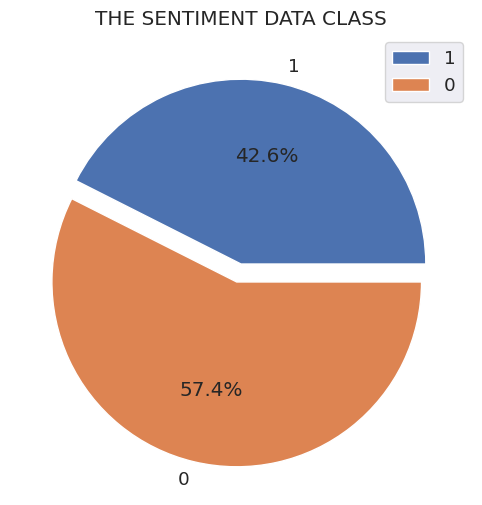

In [ ]:
#PLOTTING THE PIE CHART FOR THE COLUMN SENTIMENT
CLASS_COUNT=[]
CLASS_COUNT.append(DF['Sentiment'].value_counts()[1])
CLASS_COUNT.append(DF['Sentiment'].value_counts()[0])
print(CLASS_COUNT)

# Creating plot
fig,ax = plt.subplots()
Class=['1','0']
explode=[0,0.1]
ax.pie(CLASS_COUNT,labels=Class,explode=explode,autopct='%1.1f%%')
plt.legend(Class)
plt.title("THE SENTIMENT DATA CLASS")
plt.show()

**PLOTTING THE WORD CLOUD FOR DRUG NAMES**

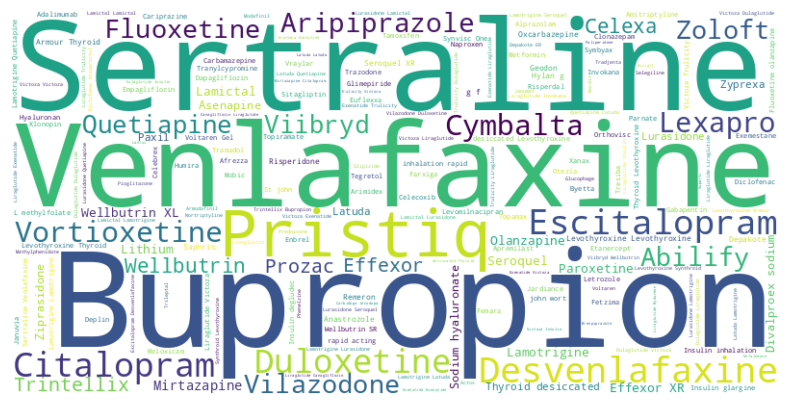

In [ ]:
#CONCATENATING ALL THE DRUG NAMES FROM THE COLUMN 'drugName' INTO A SINGLE STRING
text_data = ' '.join(DF['drugName'].astype(str))
#CREWATING WORD CLOUD OBJECT
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide the axis
plt.show()

**PLOTTING THE TOP 10 DRUG NAMES**

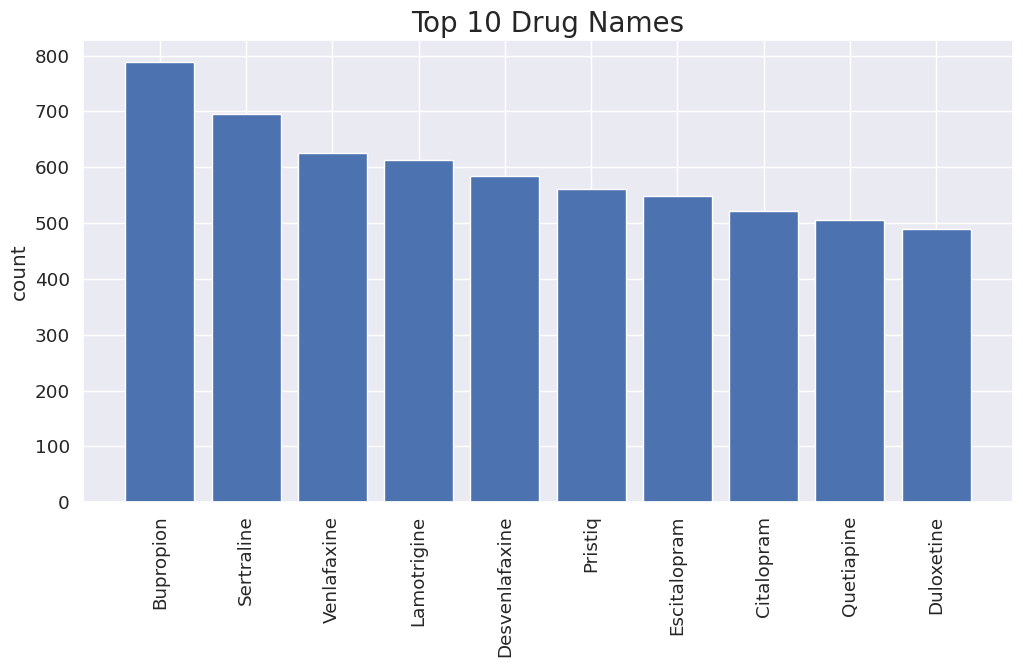

In [ ]:
plt.figure(figsize=(12,6))
conditions = DF['drugName'].value_counts(ascending = False).head(10)

plt.bar(conditions.index,conditions.values)
plt.title('Top 10 Drug Names',fontsize = 20)
plt.xticks(rotation=90)
plt.ylabel('count')
plt.show()

**PLOTTING THE BOTTOM 10 DRUG NAMES**


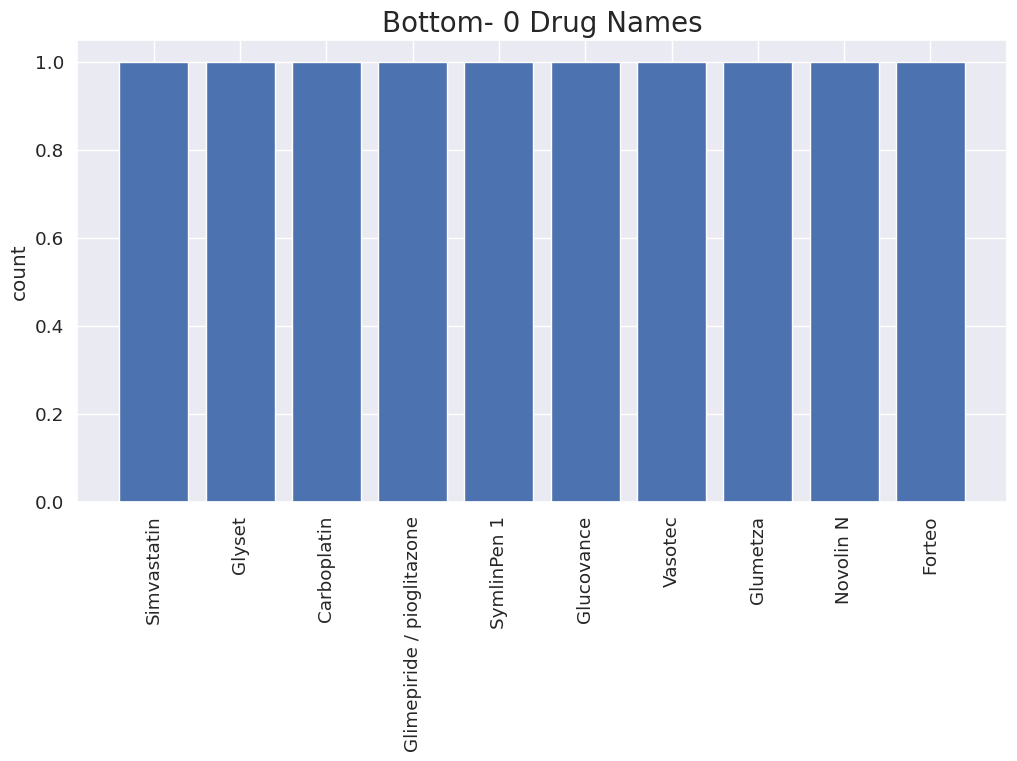

In [ ]:
plt.figure(figsize=(12,6))
conditions = DF['drugName'].value_counts(ascending = False).tail(10)

plt.bar(conditions.index,conditions.values)
plt.title('Bottom- 0 Drug Names',fontsize = 20)
plt.xticks(rotation=90)
plt.ylabel('count')
plt.show()

**PLOTTING THE WORD CLOUD FOR ALL CONDITIONS**

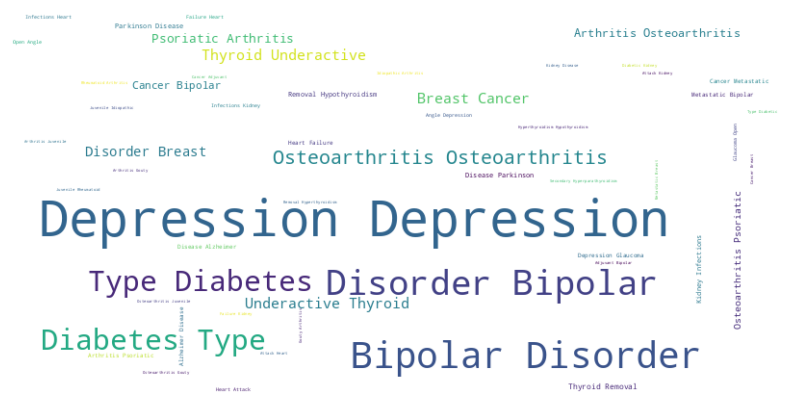

In [ ]:
#CONCATENATING ALL THE CONDITIONS FROM THE COLUMN 'condition' INTO A SINGLE STRING
text_data = ' '.join(DF['condition'].astype(str))
#CREWATING WORD CLOUD OBJECT
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide the axis
plt.show()

**PLOTTING THE TOP 5 CONDITIONS**

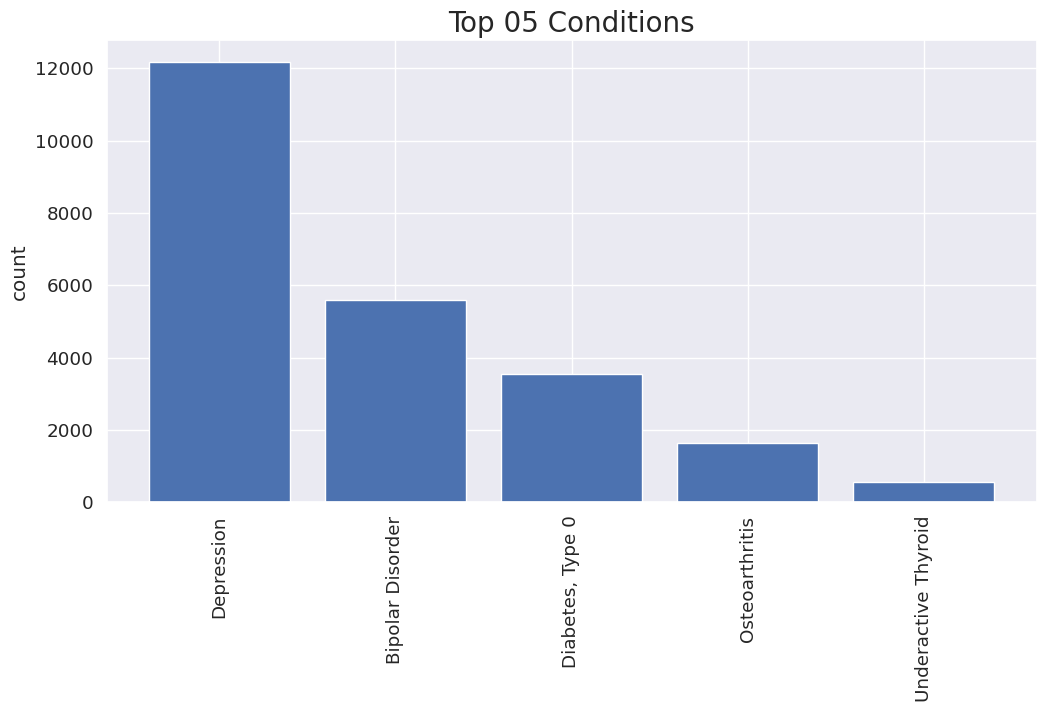

In [ ]:
plt.figure(figsize=(12,6))
conditions = DF['condition'].value_counts(ascending = False).head(5)

plt.bar(conditions.index,conditions.values)
plt.title('Top 05 Conditions',fontsize = 20)
plt.xticks(rotation=90)
plt.ylabel('count')
plt.show()

**PLOTTING THE BOTTOM 5 CONDITIONS**

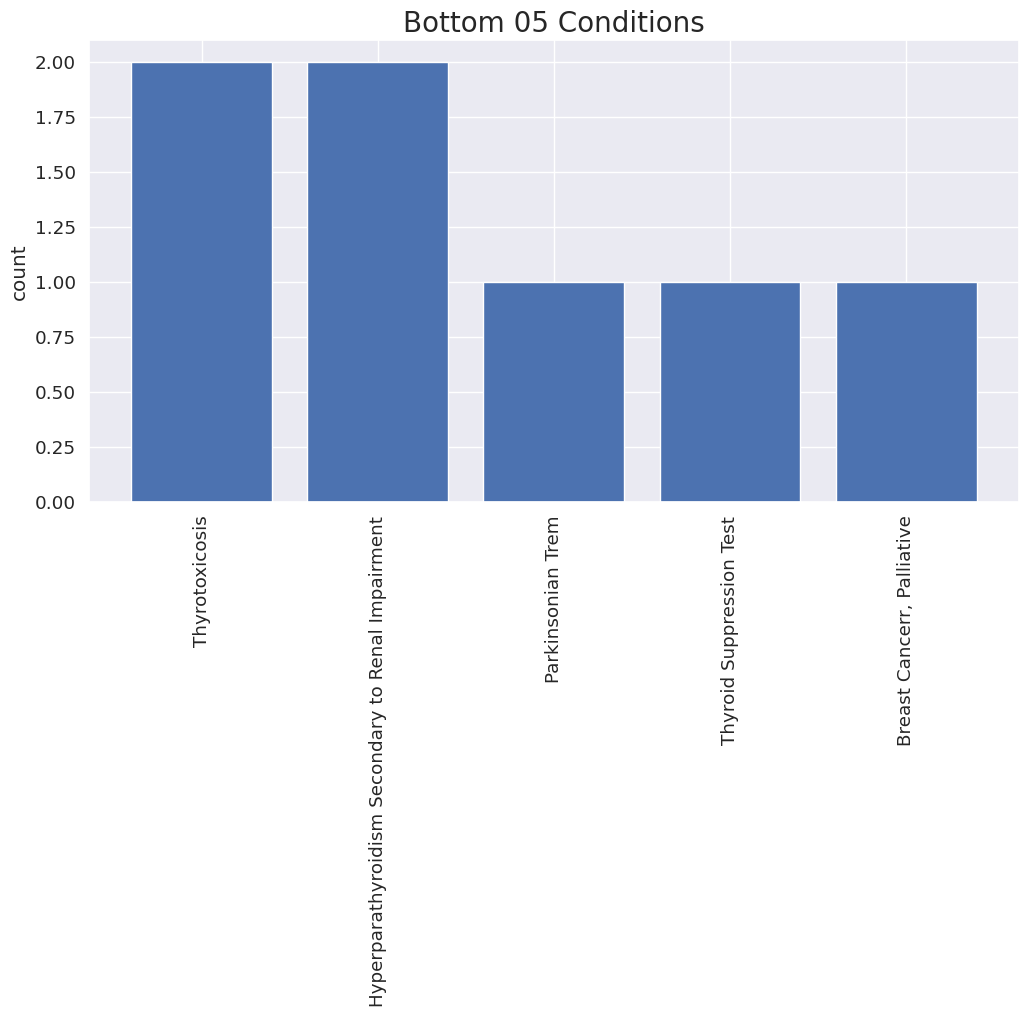

In [ ]:
plt.figure(figsize=(12,6))
conditions = DF['condition'].value_counts(ascending = False).tail(5)

plt.bar(conditions.index,conditions.values)
plt.title('Bottom 05 Conditions',fontsize = 20)
plt.xticks(rotation=90)
plt.ylabel('count')
plt.show()

**NUMBER OF DRUGS PER CONDITION**

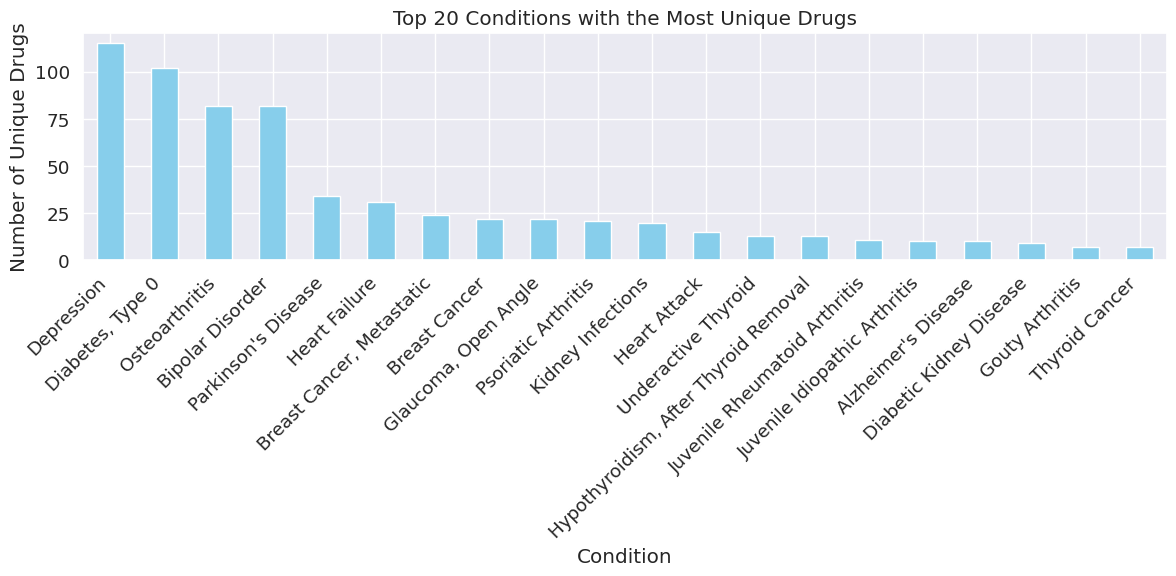

In [ ]:
#lets check the number of drugs/condition
result = DF.groupby('condition')['drugName'].nunique().sort_values(ascending=False).head(20)

# Create a bar chart
plt.figure(figsize=(12, 6))
result.plot(kind='bar', color='skyblue')
plt.title('Top 20 Conditions with the Most Unique Drugs')
plt.xlabel('Condition')
plt.ylabel('Number of Unique Drugs')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Display the plot
plt.tight_layout()
plt.show()

**PLOTTING THE TOP 20 NUMBER OF CONDITIONS PER DRUG**

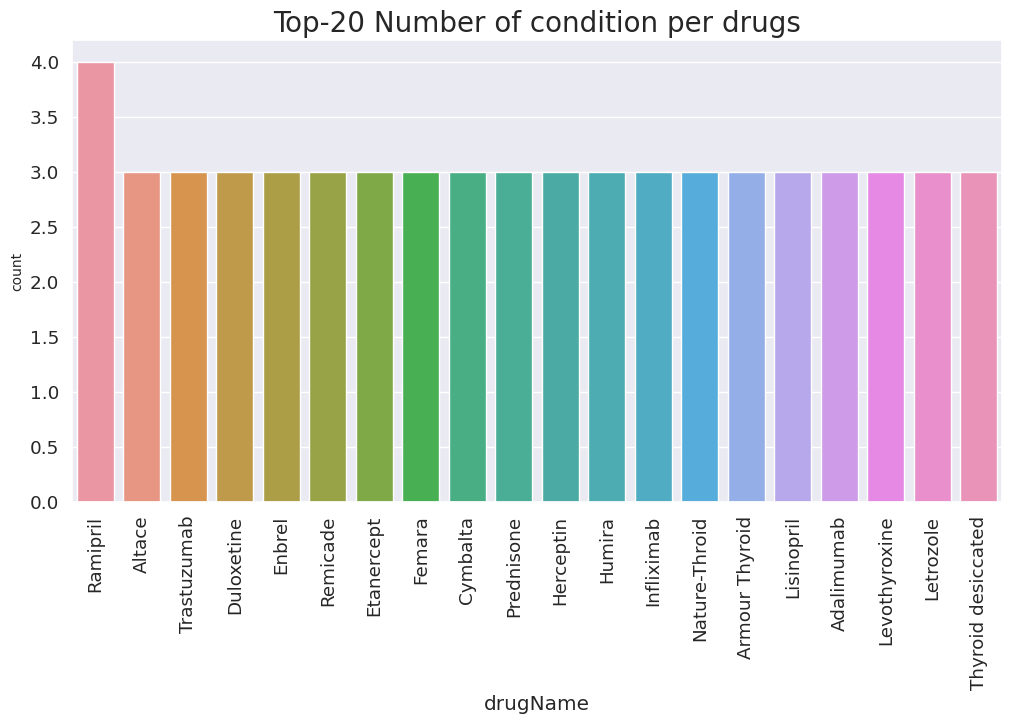

In [ ]:
#lets check the number of drugs present in our dataset condition wise
conditions_gp = DF.groupby('drugName')['condition'].nunique().sort_values(ascending=False)

#plot the top 20
# Setting the Parameter
condition_gp_top_20 = conditions_gp.head(20)
sns.set(font_scale = 1.2, style = 'darkgrid')
plt.rcParams['figure.figsize'] = [12, 6]
sns.barplot(x = condition_gp_top_20.index, y = condition_gp_top_20.values)
plt.title('Top-20 Number of condition per drugs',fontsize=20)
plt.xticks(rotation=90)
plt.ylabel('count',fontsize=10)
plt.show()

**WORD CLOUD OF POSITIVE REVIEWS**

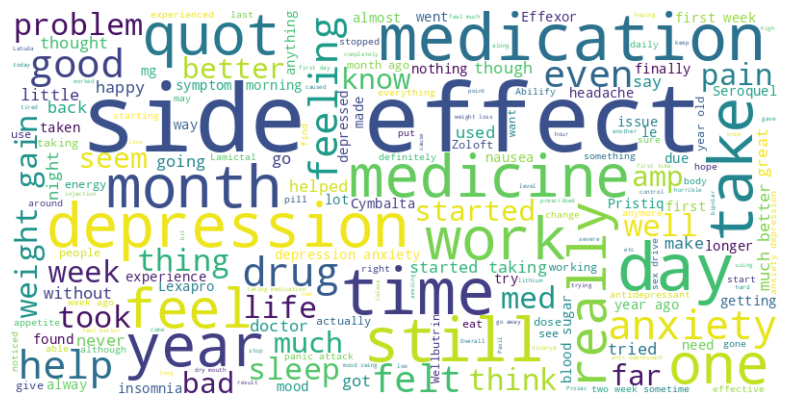

In [ ]:
text_data=" "
for index,row in DF.iterrows():
  if row['Sentiment']==1:
    text_data += str(row['review'])

#CREATING WORD CLOUD OBJECT
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide the axis
plt.show()

**WORD CLOUD OF NEGATIVE REVIEWS**

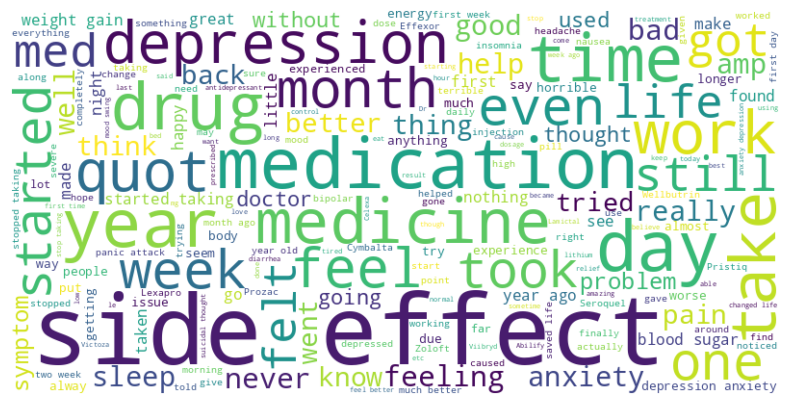

In [ ]:
text_data=" "
for index,row in DF.iterrows():
  if row['Sentiment']==0:
    text_data += str(row['review'])

#CREATING WORD CLOUD OBJECT
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide the axis
plt.show()

##MODEL BUILDING AND EVALUATION

**KNN MODEL**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [ ]:
#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(DF2['review'], DF2['Sentiment'], test_size=0.2, random_state=42)

In [ ]:
#Create a TfidfVectorizer to convert text data to TF-IDF features
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [ ]:
#Create and train a KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors (k)
knn_classifier.fit(X_train_tfidf, y_train)

KNeighborsClassifier()

In [ ]:
# Make predictions on the test data
y_pred = knn_classifier.predict(X_test_tfidf)

In [ ]:
print(y_pred)

[0 0 0 ... 1 1 1]


In [ ]:
# Evaluate the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.59      0.64      2879
           1       0.56      0.67      0.61      2254

    accuracy                           0.62      5133
   macro avg       0.63      0.63      0.62      5133
weighted avg       0.63      0.62      0.62      5133



**NAIVE BAYES MODEL**

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(DF2['review'], DF2['Sentiment'], test_size=0.2, random_state=42)

In [ ]:
# Create a TfidfVectorizer to convert text data to TF-IDF features
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [ ]:
# Create and train a Multinomial Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_tfidf, y_train)

MultinomialNB()

In [ ]:
# Make predictions on the test data
y_pred = nb_classifier.predict(X_test_tfidf)

In [ ]:
# Evaluate the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.64      0.92      0.76      2879
           1       0.77      0.35      0.48      2254

    accuracy                           0.67      5133
   macro avg       0.71      0.64      0.62      5133
weighted avg       0.70      0.67      0.64      5133



**SVM MODEL - WITH DIFFERENT KERNEL FUNCTIONS**

In [ ]:
from sklearn.svm import SVC

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(DF2['review'], DF2['Sentiment'], test_size=0.2, random_state=42)


In [ ]:
# Create a TfidfVectorizer to convert text data to TF-IDF features
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

KERNEL FUNCTION - LINEAR

In [ ]:
# Create and train SVM classifiers with different kernels
svm_linear = SVC(kernel='linear', C=1.0)
# Train the SVM classifiers
svm_linear.fit(X_train_tfidf, y_train)
# Make predictions on the test data for each model
y_pred_linear = svm_linear.predict(X_test_tfidf)
# Evaluate each model
print("Linear Kernel SVM:")
print(classification_report(y_test, y_pred_linear))

Linear Kernel SVM:
              precision    recall  f1-score   support

           0       0.73      0.81      0.77      2879
           1       0.71      0.61      0.66      2254

    accuracy                           0.72      5133
   macro avg       0.72      0.71      0.71      5133
weighted avg       0.72      0.72      0.72      5133



KERNEL FUNCTION - POLYNOMIAL

In [ ]:
# Create and train SVM classifiers with different kernels
svm_poly = SVC(kernel='poly', degree=3, C=1.0)
# Train the SVM classifiers
svm_poly.fit(X_train_tfidf, y_train)
# Make predictions on the test data for each model
y_pred_poly = svm_poly.predict(X_test_tfidf)
# Evaluate each model
print("Polynomial Kernel SVM:")
print(classification_report(y_test, y_pred_poly))

Polynomial Kernel SVM:
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      2879
           1       0.95      0.73      0.83      2254

    accuracy                           0.86      5133
   macro avg       0.89      0.85      0.86      5133
weighted avg       0.88      0.86      0.86      5133



KERNEL FUNCTION - RBF

In [ ]:
# Create and train SVM classifiers with different kernels
svm_rbf = SVC(kernel='rbf', C=1.0)
# Train the SVM classifiers
svm_rbf.fit(X_train_tfidf, y_train)
# Make predictions on the test data for each model
y_pred_rbf = svm_rbf.predict(X_test_tfidf)
# Evaluate each model
print("RBF Kernel SVM:")
print(classification_report(y_test, y_pred_rbf))

RBF Kernel SVM:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      2879
           1       0.86      0.79      0.82      2254

    accuracy                           0.85      5133
   macro avg       0.85      0.84      0.85      5133
weighted avg       0.85      0.85      0.85      5133



**LOGISTIC REGRESSION**

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(DF2['review'], DF2['Sentiment'], test_size=0.2, random_state=42)

In [ ]:
# Create a TfidfVectorizer to convert text data to TF-IDF features
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [ ]:
# Create and train a Logistic Regression classifier
logistic_regression = LogisticRegression(max_iter=1000)  # You can adjust hyperparameters as needed
logistic_regression.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
# Make predictions on the test data
y_pred = logistic_regression.predict(X_test_tfidf)

In [ ]:
# Evaluate the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.82      0.76      2879
           1       0.71      0.56      0.63      2254

    accuracy                           0.70      5133
   macro avg       0.70      0.69      0.69      5133
weighted avg       0.70      0.70      0.70      5133



We can see that out of all the models the SVM Model with polynomial kernel function has the highest accuracy

##EXPLAINABLE ML ALGORITHMS - LIME AND SHAP

LIME (Local Interpretable Model-agnostic Explanations) and SHAP (SHapley Additive exPlanations) are powerful tools for interpreting machine learning models

In [ ]:
!pip install lime shap

In [ ]:
import lime
import lime.lime_text
from lime.lime_text import LimeTextExplainer
import shap
from sklearn.pipeline import make_pipeline

###**KNN**

**APPLYING THE LIME ALGORITM FOR KNN MODEL**

In [ ]:
# Create a LIME Explainer
explainer = lime.lime_text.LimeTextExplainer(class_names=['class_label_0', 'class_label_1'])

# Select a random test instance (you can choose any instance)
test_instance = X_test.iloc[0]

# Create a pipeline with your KNN classifier and TF-IDF vectorizer
pipeline = make_pipeline(tfidf_vectorizer, knn_classifier)

# Explain the model's prediction for the selected instance
explanation = explainer.explain_instance(test_instance, pipeline.predict_proba)

# Visualize the explanation
explanation.show_in_notebook()


**APPLYING THE SHAP ALGORITM FOR KNN MODEL**

SHAP cannot be applied for KNN- Algorithm because it can be used only for callable models and KNN is an instance based algorithm.

###**NAIVE BAYES CLASSIFIER**

**APPLYING THE LIME ALGORITM FOR NAIVE BAYES MODEL**

In [ ]:
# Create a LIME Explainer
explainer = lime.lime_text.LimeTextExplainer(class_names=['class_label_0', 'class_label_1'])

# Select a random test instance (you can choose any instance)
test_instance = X_test.iloc[0]

# Create a pipeline with your Naive Bayes classifier and TF-IDF vectorizer
pipeline = make_pipeline(tfidf_vectorizer, nb_classifier)

# Explain the model's prediction for the selected instance
explanation = explainer.explain_instance(test_instance, pipeline.predict_proba)

# Visualize the explanation
explanation.show_in_notebook()

**APPLYING THE SHAP ALGORITM FOR NAIVE BAYES MODEL**

SHAP cannot be applied for Naive Bayes Classifier Model because it can be used only for callable models.

NOTE : THE ALTERNATE MODEL THAT CAN BE USED TO DETERMINE THE SHAP ALGORITHM'S INFERENCE FOR KNN AND NAIVE BAYES IS LOGISTIC REGRESSION

###**LOGISTIC REGRESSION**

**APPLYING THE LIME ALGORITM FOR LOGISTIC REGRESSION MODEL**

In [ ]:
# Create a LIME Explainer
explainer = lime.lime_text.LimeTextExplainer(class_names=['class_label_0', 'class_label_1'])

In [ ]:
# Select a random test instance
test_instance = X_test.iloc[0]

In [ ]:
# Create a pipeline with your logistic regression model and TF-IDF vectorizer
pipeline = make_pipeline(tfidf_vectorizer, logistic_regression)

In [ ]:
# Explain the model's prediction for the selected instance
explanation = explainer.explain_instance(test_instance, pipeline.predict_proba)

# Visualize the explanation
explanation.show_in_notebook()

 LIME generates a local, interpretable explanation for the model's prediction on a particular instance.

**APPLYING THE SHAP ALGORITM FOR LOGISTIC REGRESSION MODEL**

In [ ]:
# Create a SHAP explainer for the logistic regression model
explainer = shap.Explainer(logistic_regression, X_train_tfidf)

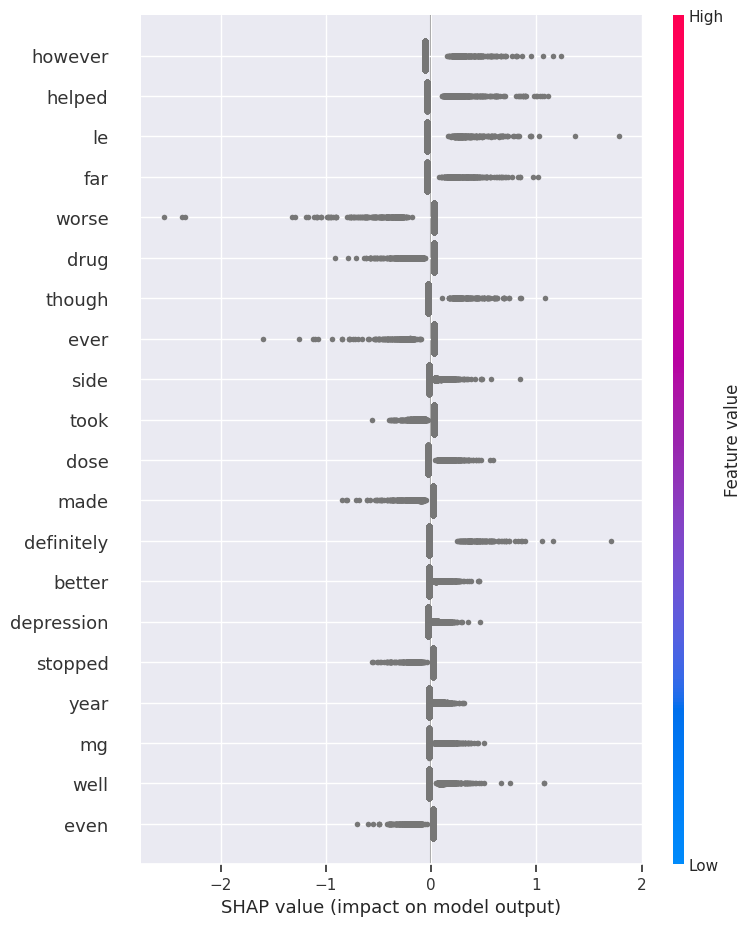

In [ ]:
# Calculate SHAP values for the test dataset
shap_values = explainer.shap_values(X_test_tfidf)

# Summary plot for feature importance
shap.summary_plot(shap_values, X_test_tfidf, feature_names=tfidf_vectorizer.get_feature_names_out())

 SHAP provides a global view of feature importance and contributions to each prediction.

##UI INTERFACE

In [ ]:
!pip install -q streamlit

In [ ]:
!npm install localtunnel

In [ ]:
%%writefile app.py

##IMPORTING THE LIBRARIES
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random                       #FOR PSEUDO RANDOM NUMBER GENERATION
from wordcloud import WordCloud     #TO VISUALIZE THE TEXT DATA
from wordcloud import STOPWORDS

#IMPORTING THE NLTK PACKAGE
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.sentiment import SentimentIntensityAnalyzer

#DOWLOADING THE NLTK RESOURCES
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('vader_lexicon')

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

# Import the Streamlit library
import streamlit as st


#DEFINING FUCNTIONS TO PERFORM THE NLTK PREPROCESSING STEPS

#1.USED TO TOKENIZE THE TEXT DATA                                               - EX : I AM ASH =>['I','AM','ASH']
def tokenize_text(text):
    tokens = word_tokenize(text)
    return tokens
#Tokenization is the process of splitting a text into individual words or units.

#2.USED TO REMOVE COMMON ENGLISH STOPWORDS FROM TOKENISED DATA
def remove_stopwords(tokens):
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
    return filtered_tokens
#Stopwords are words that are considered to be of little value in text analysis because they are very common and don't carry much meaningful information (e.g., "the," "and," "in").
#We use the NLTK library's list of English stopwords to identify and remove them from the list of tokens.

# 3.USED TO NORMALIZE THE TOKEN                                                 - EX : ["loving", "cats"]  => ["love", "cat"]
def lemmatize_text(tokens):
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return lemmatized_tokens
#Lemmatization is the process of reducing words to their base or root form. It aims to normalize words so that different inflections or forms of the same word are represented by a common base form.
#It uses the WordNetLemmatizer from the NLTK library to perform lemmatization.

#4.MAIN FUNCTION TO PERFORM ALL NLTK PREPROCESSING
def preprocess_text(text):
    tokens = tokenize_text(text)
    tokens = remove_stopwords(tokens)
    tokens = lemmatize_text(tokens)
    return ' '.join(tokens)  # Join the tokens back into a single string

#5.SIMILAR TO LEMATIZATION
def stem_text(tokens):
    stemmer = PorterStemmer()
    stemmed_tokens = [stemmer.stem(word) for word in tokens]
    return stemmed_tokens

#READING THE CSV FILE
DF2 = pd.read_csv('/content/Preprocessed_DataFrame.csv')
print(DF2)


#-------------------------------------------------
#KNN
#--------------------------------------------------
#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(DF2['review'], DF2['Sentiment'], test_size=0.2, random_state=42)

#Create a TfidfVectorizer to convert text data to TF-IDF features
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

#Create and train a KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors (k)
knn_classifier.fit(X_train_tfidf, y_train)

# Make predictions on the test data
#y_pred = knn_classifier.predict(X_test_tfidf)

#----------------------------------
#LOGISTIC REGRESSION
#----------------------------------
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(DF2['review'], DF2['Sentiment'], test_size=0.2, random_state=42)
# Create a TfidfVectorizer to convert text data to TF-IDF features
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Create and train a Logistic Regression classifier
logistic_regression = LogisticRegression(max_iter=1000)  # You can adjust hyperparameters as needed
logistic_regression.fit(X_train_tfidf, y_train)


# Set the heading
st.markdown("# DRUG REVIEW SENTIMENT ANALYSIS")

# Set the subheading in a smaller font
st.markdown("### ML LAB TEST - 2")

# Add a title for your app
st.title("TEST DATA INPUT")

# Add a text input field where the user can enter the drug name
drug_name = st.text_input("ENTER THE NAME OF THE DRUG : ", ' ')

# Add a text input field where the user can enter the condition name
condition_name = st.text_input("ENTER THE CONDITION FOR WHICH THE DRUG IS USED : ", " ")

# Add a text input field where the user can enter the review
review = str(st.text_input("ENTER THE REVIEW OF THE DRUG : ", " "))

# Create a dictionary to hold user inputs
user_input = {'drugName': [drug_name], 'condition': [condition_name], 'review': [review]}

# Convert the dictionary to a DataFrame
test_data = pd.DataFrame(user_input)

# Add a button to submit the user input
if st.button("Submit"):
    st.success(f"The Drug {drug_name} is used for the condition {condition_name}.\nREVIEW : {review}")
    # Display the user input DataFrame
    st.success("User Input DataFrame:")
    st.write(test_data)
    #PROCESSING THE TEST DATA
    #CALLING THE preprocess_text FUNCTION
    test_data['review'] = test_data['review'].apply(preprocess_text)

    # PREDICTION USING LOGARITHMIC REGRESSION ALGORITHM
    st.markdown("PREDICTED SENTIMENT USING LOGISTIC REGRESSION ALGORITHM")
    # Transform the user input using the same TF-IDF vectorizer
    test_tfidf = tfidf_vectorizer.transform(test_data['review'])
    # Make predictions on the test data
    y_pred = logistic_regression.predict(test_tfidf)
    y_pred = y_pred[0]
    st.success(f"The predicted sentiment is: {y_pred}")

    st.markdown("PREDICTED SENTIMENT USING KNN ALGORITHM")
    # Transform the user input using the same TF-IDF vectorizer
    test_tfidf = tfidf_vectorizer.transform(test_data['review'])
    # Make predictions on the test data
    y_pred_knn = knn_classifier.predict(test_tfidf)
    y_pred_knn = y_pred_knn[0]
    st.success(f"The predicted sentiment using KNN is: {y_pred_knn}")


In [ ]:
!streamlit run /content/app.py &>/content/logs.txt & curl ipv4.icanhazip.com

In [ ]:
!npx localtunnel --port 8501